### Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
bank_data = pd.read_csv("bank_data.csv")

In [2]:
bank_data.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [3]:
bank_data.shape

(600, 12)

Looking from the summary, there are 600 observations with 12 features. There are 3 numerical features namely age, income & children and the rest are categorical features namely gender, region, married etc.,

In [4]:
bank_data.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


The mean value for age, income and childrens are 42, 27524 & 1 respectively which are rounded to nearest integer. The standard deviation is as follows 14.4, 12899.4, 1.05. The above table also describes other statistics like the 25th, 50th & 75th quantile for age, income and children.

The below function is used to plot the barplot, since there are 8 categorical fields, i found this way to be much faster than plotting individually.

In [5]:
def plot_custom(col_name):
    fig = plt.figure()
    rgplot = bank_data.groupby(col_name).size().plot(kind='bar')
    fig.suptitle('Histogram of ' + col_name, fontsize=14, fontweight='bold')
    rgplot.set_xlabel(col_name)
    rgplot.set_ylabel("Frequency")

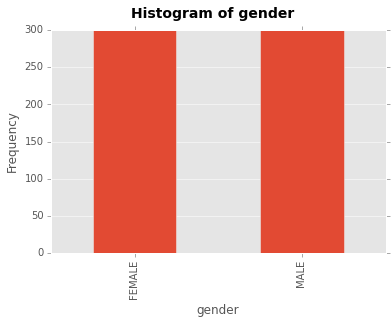

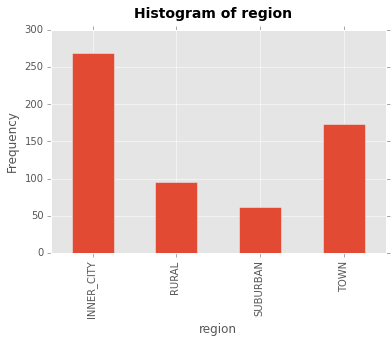

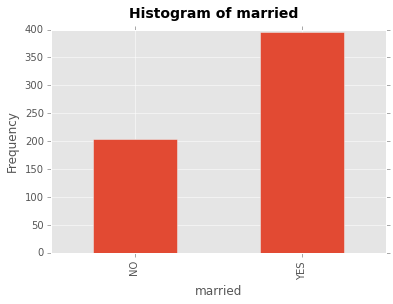

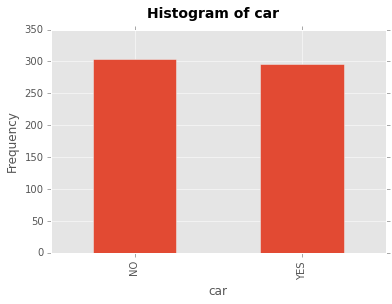

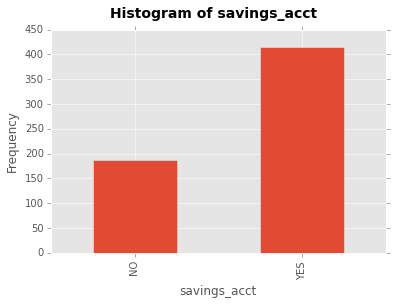

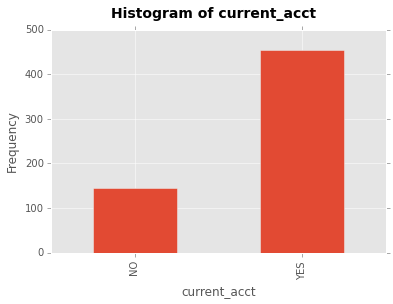

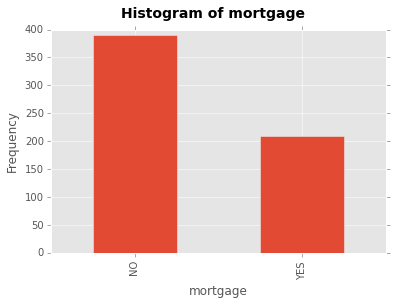

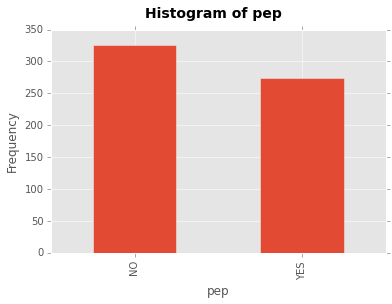

In [6]:
categorical_fields = ['gender','region','married','car','savings_acct','current_acct','mortgage','pep']
for i in categorical_fields:
    plot_custom(i)

except for gender & car features, all other features are unbalanced in some way, major portion of observations from our sample live in inner city who are married.

### Suppose that because of the bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.

In [7]:
pep_data = bank_data[bank_data['pep'] == 'YES']
nonpep_data = bank_data[bank_data['pep'] == 'NO']

In [8]:
pep_data.describe()

,age,income,children
count,274.000000,274.000000,274.000000
mean,45.127737,30644.919453,0.945255
std,14.327991,13609.613043,0.860571
min,18.000000,7756.360000,0.000000
25%,34.000000,19639.475000,0.000000
50%,45.000000,28080.050000,1.000000
75%,58.000000,38458.350000,1.000000
max,67.000000,63130.100000,3.000000


In [9]:
nonpep_data.describe()

,age,income,children
count,326.000000,326.000000,326.000000
mean,40.098160,24900.953374,1.067485
std,14.123506,11661.123422,1.195524
min,18.000000,5014.210000,0.000000
25%,27.000000,15366.475000,0.000000
50%,40.000000,23105.000000,0.000000
75%,51.000000,31210.900000,2.000000
max,67.000000,61554.600000,3.000000


In numeric fields, we can see that users who buy pep are mostly 5 years older and tend to have $6k higher income than than those who dont buy 

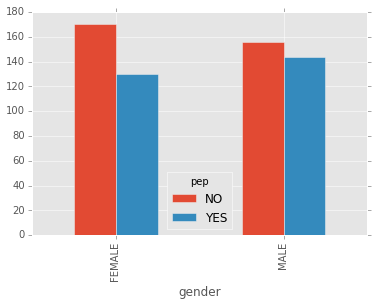

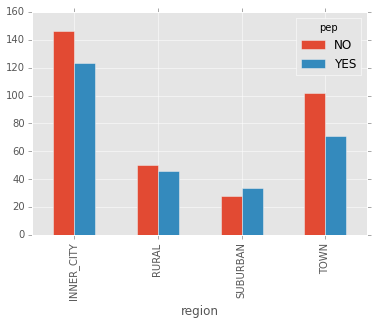

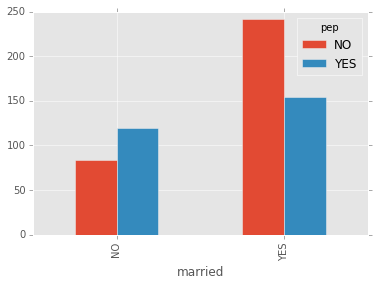

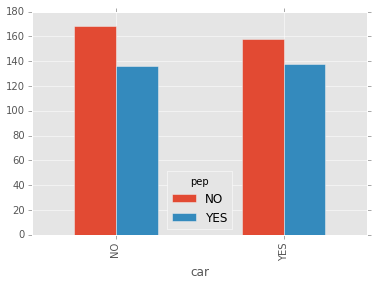

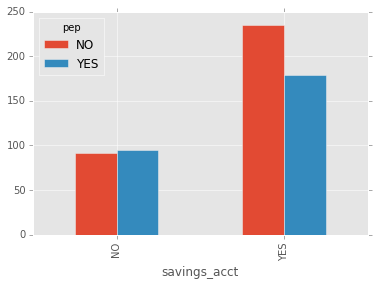

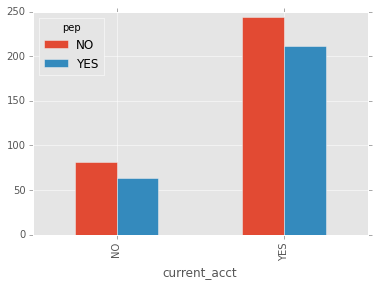

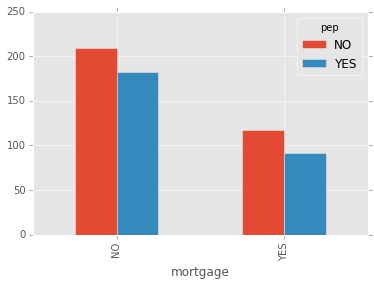

In [10]:
def plot_group_custom(col_name):
    crosstab_data = pd.crosstab(bank_data[col_name], bank_data['pep'])
    plt.show(crosstab_data.plot(kind="bar"))
for i in categorical_fields[0:7]:
    plot_group_custom(i)

It looks like most users either male or female dont buy pep especially female, users who live in suburban tend buy pep compared to other regions. Users who are married, majority of them dont buy pep while the opposite can be said for users who are not married. Although having a car doens't make any difference here. 

### Use z-score normalization to standardize the values of the income attribute.

In [11]:
from scipy import stats
znorm_income = stats.zscore(bank_data['income'])

In [12]:
new_data = pd.DataFrame()
new_data['zincome'] = znorm_income

### Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old") 

In [13]:
new_data['age_group'] = 'young'
new_data['age_group'][(bank_data.age >35) & (bank_data.age < 50)] = 'mid-age'
new_data['age_group'][bank_data.age >50] = 'old'

/Users/akhil/.graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/akhil/.graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Use Min-Max Normalization to transform the values of all numeric attributes in the original table (income, age, children) onto the range 0.0-1.0. 

In [14]:
def custom_norm(x):
    return (x-min(x))/(max(x)-min(x))
new_data['norm_age'] = custom_norm(bank_data['age'])
new_data['norm_income'] = custom_norm(bank_data['income'])
new_data['norm_children'] = custom_norm(bank_data['children'])

#### Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). Then numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submitit along with your assignment 

In [15]:
def create_dummies(col_name,df):
    temp = pd.get_dummies(df[col_name])
    for i in range(len(temp.columns)):
        temp.columns.values[i] = col_name+'_'+temp.columns[i]
    return temp
for i in categorical_fields:
    ind_dummies = create_dummies(i, bank_data)
    new_data = pd.concat([ind_dummies, new_data], axis = 1)

In [16]:
new_data = pd.concat([new_data,create_dummies('age_group',new_data)], axis = 1)
new_data = new_data.drop('age_group',1)
new_data.to_csv('bank_numeric.csv', sep=',',index=False)

### Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix.  

In [17]:
cor_matrix = new_data.corr()
print cor_matrix

                     pep_NO   pep_YES  mortgage_NO  mortgage_YES  \
pep_NO             1.000000 -1.000000    -0.024182      0.024182   
pep_YES           -1.000000  1.000000     0.024182     -0.024182   
mortgage_NO       -0.024182  0.024182     1.000000     -1.000000   
mortgage_YES       0.024182 -0.024182    -1.000000      1.000000   
current_acct_NO    0.025141 -0.025141    -0.036704      0.036704   
current_acct_YES  -0.025141  0.025141     0.036704     -0.036704   
savings_acct_NO   -0.072779  0.072779    -0.001588      0.001588   
savings_acct_YES   0.072779 -0.072779     0.001588     -0.001588   
car_NO             0.018917 -0.018917    -0.007743      0.007743   
car_YES           -0.018917  0.018917     0.007743     -0.007743   
married_NO        -0.189578  0.189578    -0.021711      0.021711   
married_YES        0.189578 -0.189578     0.021711     -0.021711   
region_INNER_CITY -0.001054  0.001054    -0.002098      0.002098   
region_RURAL      -0.019714  0.019714     0.0519

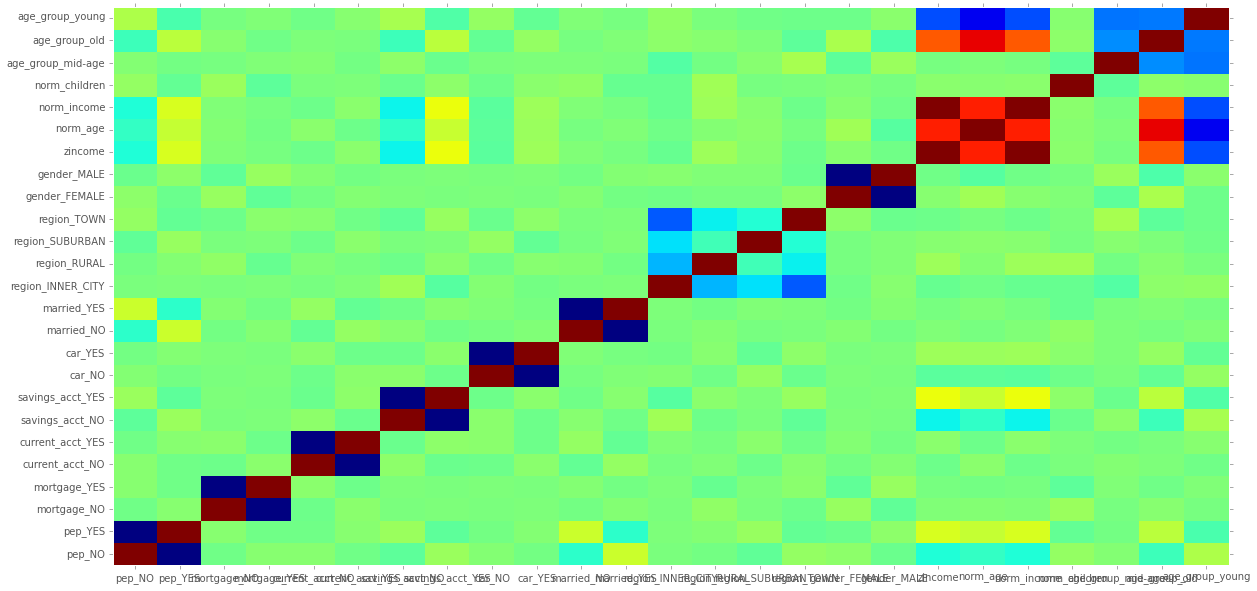

In [18]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
column_labels = new_data.columns
row_labels = new_data.columns
fig, ax = plt.subplots()
heatmap = ax.pcolor(cor_matrix)
ax.set_xticks(np.arange(cor_matrix.shape[1]) + 0.5, minor=False,)
ax.set_yticks(np.arange(cor_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(row_labels)
ax.set_yticklabels(column_labels)
plt.show()

abvisouly each features has its counterpart as oppositely correlated, but we can see that certain age groups like young and old are strongly correlated with normailezed income, age and standardized income. 

### Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated? 

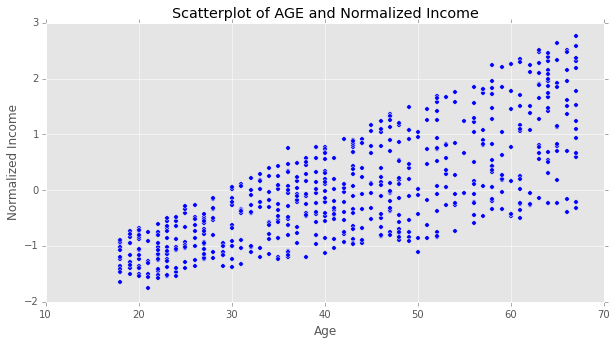

In [19]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.scatter(bank_data['age'], new_data['zincome'], alpha=1)
plt.xlabel('Age',)
plt.ylabel('Normalized Income')
plt.title('Scatterplot of AGE and Normalized Income')

As we can see, there is clearly an upward trend.

### Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins). 

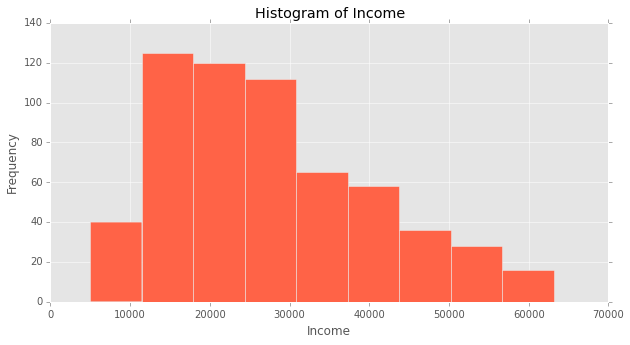

In [20]:
plt.hist(bank_data['income'],bins=9,color="tomato")
plt.xlabel('Income',)
plt.ylabel('Frequency')
plt.title('Histogram of Income')

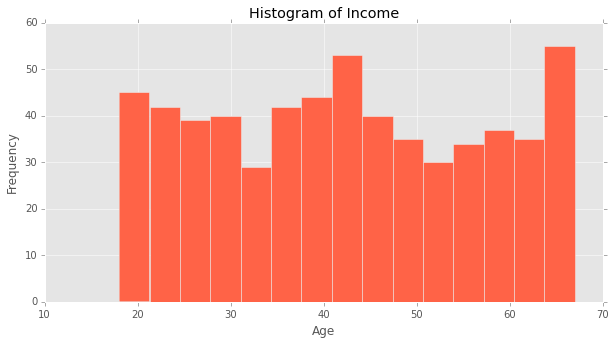

In [21]:
plt.hist(bank_data['age'],bins=15,color="tomato")
plt.xlabel('Age',)
plt.ylabel('Frequency')
plt.title('Histogram of Income')

### Using a bargraph, plot the distribution of the values of the region attribute.


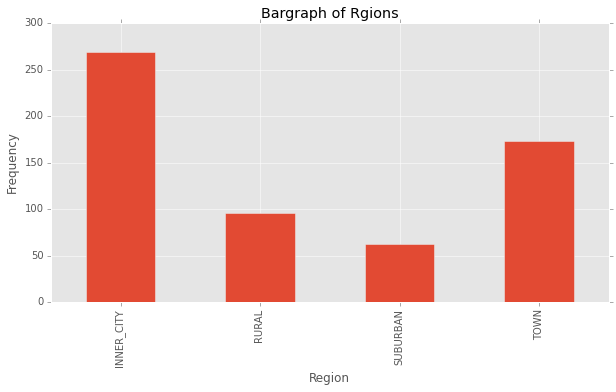

In [22]:
bank_data.groupby('region').size().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Bargraph of Rgions')

### Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. 

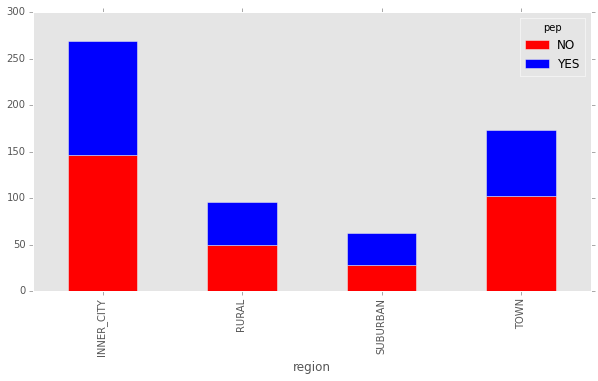

In [23]:
pd_data = pd.crosstab(bank_data['region'], bank_data['pep'])
pd_data
pd_data.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
